<a href="https://colab.research.google.com/github/andrew-wairegi-school/core-week10-IP/blob/main/Moringa_Data_Science_Core_W10_Independent_Project_2022_1_Andrew_Wairegi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Inclusion - East Africa

In [ ]:
Github: https://github.com/andrew-wairegi-school/core-week10-IP

By: Andrew Wairegi

Data definitions:

*   Country - Country of Interviewee
*   Year - Year of Survey
*   Uniqueid - Unique Identifier for interviewee
*   bank_account - Has bank account (Yes / No)
*   location_type - Location (Rural / Urban)
*   cellphone_access - Access to cellphone (Yes / No)
*   household_size - Number of people living in the house
*   age_of_respondent - Age of the respondent
*   gender_of_respondent - Gender (Male / Female)
*   relationship_with_head - Relationship with head of household (Head of Household / Spouse / Child / Parent / Other relative / Other non-relatives / Dont know)
*   marital_status - Marital status ("Married/Living together" / "Divorced/Seperated" / "Widowed" / "Single/Never Married" / "Don’t know")
*   education_level - Highest level of Education ("No formal education" / "Primary education" / "Secondary education" / "Vocational/Specialised training" / "Tertiary education" / "Other/Dont know/RTA")
*   job_type - Type of job ("Farming and Fishing" / "Self employed" / "Formally employed Government" / "Formally employed Private" / "Informally employed" / "Remittance Dependent" / "Government Dependent" / "Other Income" / "No Income" / "Dont Know/Refuse to answer")











## 1. Defining the Question

### a) Specifying the question

To create a machine learning model, that allows Finscope to be able to predict whether a person will be financially included or not. Based on their quantitative data.

### b) Defining Metric for success

An accuracy score of over 80%. On both predicting that a person will be financially included or not. Would mean that the model is successfull.

### c) Understanding the context

The countries have undertaken a study to determine whether individuals are financially included in their country or not. However, they want to have a clear way of determining whether a person will be financially included or not. That is why they have turned to Finscope to conduct the study.

### d) Experimental design

Process:

1. Defining the Question
2. Data Loading
3. Previewing Data
4. Cleaning Data
5. Exploratory Data Analysis (EDA)
6. Implementing the Solution
7. Challenging the solution
8. Conclusion
9. Recommendation
10. Follow up questions

### e) Data relevance

I believe the data is relevant. Because it was carried out by the countries. This means they were able to get accurate data about the people in their population. This means that all the data is true, and it can be used for the analysis and model creation.

## 2. Reading the data

In [74]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [75]:
# Reading the data
df = pd.read_csv("financial_inclusion_train.csv")
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## 3. Previewing the data

In [76]:
# Number of records
df.shape

(23524, 13)

In [77]:
# Top of dataset
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [78]:
# Tail of dataset
df.tail()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [79]:
# Checking if datatypes are appropriate
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


## 4. Cleaning the Data

In [80]:
# 1. Checking for null values
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [81]:
# 2. Checking for duplicates
df.duplicated().sum()

0

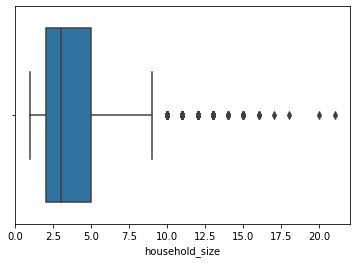

In [82]:
# 3. Checking for outliers
# this will be done for the continuous value columns, 
# and not the value counts
sns.boxplot(data = df, x = "household_size")

In [83]:
# Some households have very many people, for example in Indian houses in Kenya,
# Also there may be some countries where they are poor. So they choose to live in many numbers,
# on one property. This could be the reason for the high household number.

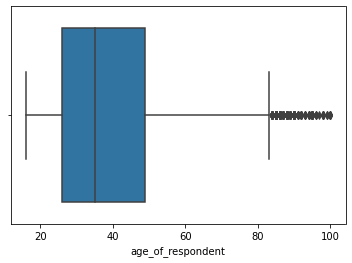

In [84]:
sns.boxplot(data = df, x = "age_of_respondent")

In [85]:
# It is normal to have respondents ages ranging from 0 - 100.
# So it is not abnormal. Also the mean is around 40, so it is not abnormal.

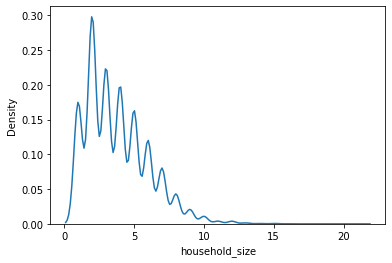

In [86]:
# 4. Checking for anomalies
sns.kdeplot(data = df, x = "household_size")

In [87]:
# It's normal for the household size to go up and down
# as there are different household sizes that are regarded normal.
# So there may be different maxes between house size ranges.

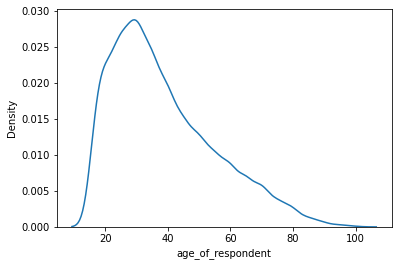

In [88]:
sns.kdeplot(data = df, x = "age_of_respondent")

In [89]:
# This is very normal, as if the survey was being done on the population.
# Most people live between 0 & 100. The peak should be around 40, for household owners.
# Then it should decrease dramatically as age increases.

In [90]:
# 5. Changing column names
# They are all ok, as they appear to have underscores
# between the names. They are all also in lowercase, so that is ok.

In [91]:
# 6. Removing whitespaces from column names
# & values

# Columns names
df.columns = df.columns.str.strip()

# Column values
string_columns = ["bank_account", "location_type", "cellphone_access", "gender_of_respondent", "relationship_with_head", "marital_status", "education_level", "job_type"]
df[string_columns] = df[string_columns].applymap(str.strip)

In [92]:
# 7. Dropping unneeded columns 
df.drop(["country", "year","uniqueid"], axis = 1, inplace = True)

## 5. Data preparation

In [93]:
# Creating a numeric DF
df_numeric = df.copy()

In [94]:
from sklearn.preprocessing import LabelEncoder
Labelencoder = LabelEncoder()

In [95]:
# Converting categorical columns to numeric

In [96]:
df_numeric["location_type"] = Labelencoder.fit_transform(df_numeric["location_type"])
Labelencoder_mapping = dict(zip(Labelencoder.classes_, Labelencoder.transform(Labelencoder.classes_)))
print("Name mappings" + "\n" + str(Labelencoder_mapping))

Name mappings
{'Rural': 0, 'Urban': 1}


In [97]:
df_numeric["relationship_with_head"] = Labelencoder.fit_transform(df_numeric["relationship_with_head"])
Labelencoder_mapping = dict(zip(Labelencoder.classes_, Labelencoder.transform(Labelencoder.classes_)))
print("Name mappings" + "\n" + str(Labelencoder_mapping))

Name mappings
{'Child': 0, 'Head of Household': 1, 'Other non-relatives': 2, 'Other relative': 3, 'Parent': 4, 'Spouse': 5}


In [98]:
df_numeric["marital_status"] = Labelencoder.fit_transform(df_numeric["marital_status"])
Labelencoder_mapping = dict(zip(Labelencoder.classes_, Labelencoder.transform(Labelencoder.classes_)))
print("Name mappings" + "\n" + str(Labelencoder_mapping))

Name mappings
{'Divorced/Seperated': 0, 'Dont know': 1, 'Married/Living together': 2, 'Single/Never Married': 3, 'Widowed': 4}


In [99]:
df_numeric["education_level"] = Labelencoder.fit_transform(df_numeric["education_level"])
Labelencoder_mapping = dict(zip(Labelencoder.classes_, Labelencoder.transform(Labelencoder.classes_)))
print("Name mappings" + "\n" + str(Labelencoder_mapping))

Name mappings
{'No formal education': 0, 'Other/Dont know/RTA': 1, 'Primary education': 2, 'Secondary education': 3, 'Tertiary education': 4, 'Vocational/Specialised training': 5}


In [100]:
df_numeric["job_type"] = Labelencoder.fit_transform(df_numeric["job_type"])
Labelencoder_mapping = dict(zip(Labelencoder.classes_, Labelencoder.transform(Labelencoder.classes_)))
print("Name mappings" + "\n" + str(Labelencoder_mapping))

Name mappings
{'Dont Know/Refuse to answer': 0, 'Farming and Fishing': 1, 'Formally employed Government': 2, 'Formally employed Private': 3, 'Government Dependent': 4, 'Informally employed': 5, 'No Income': 6, 'Other Income': 7, 'Remittance Dependent': 8, 'Self employed': 9}


In [101]:
df_numeric["cellphone_access"] = df_numeric["cellphone_access"].replace({"Yes": 1, "No": 0})

In [102]:
df_numeric["gender_of_respondent"] = df_numeric["gender_of_respondent"].replace({"Male": 1, "Female": 0})

In [103]:
df_numeric["bank_account"] = df_numeric["bank_account"].replace({"Yes": 1, "No": 0})

In [104]:
# Previewing the data
df_numeric.head()

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,1,0,1,3,24,0,5,2,3,9
1,0,0,0,5,70,0,1,4,0,4
2,1,1,1,5,26,1,3,3,5,9
3,0,0,1,5,34,0,1,2,2,3
4,0,1,0,8,26,1,0,3,2,5


In [105]:
# Checking the data types
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   bank_account            23524 non-null  int64
 1   location_type           23524 non-null  int64
 2   cellphone_access        23524 non-null  int64
 3   household_size          23524 non-null  int64
 4   age_of_respondent       23524 non-null  int64
 5   gender_of_respondent    23524 non-null  int64
 6   relationship_with_head  23524 non-null  int64
 7   marital_status          23524 non-null  int64
 8   education_level         23524 non-null  int64
 9   job_type                23524 non-null  int64
dtypes: int64(10)
memory usage: 1.8 MB


## 5. Exploratory Data analysis

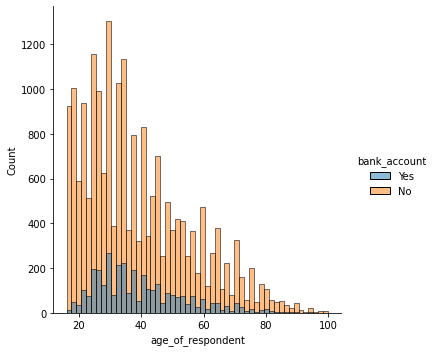

In [53]:
sns.displot(data = df, x = "age_of_respondent", hue = "bank_account")

In [ ]:
# The distribution looks normal
# As the amount of people without a bank account
# decreases, so do the amount of people with a bank account.
# Which means it's equally distributed.

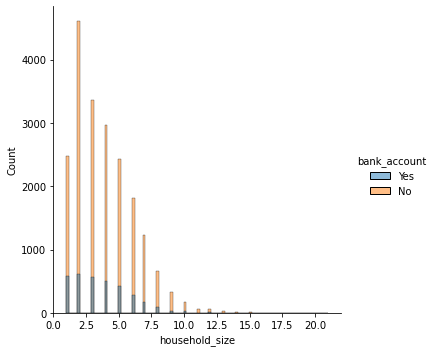

In [54]:
sns.displot(data = df, x = "household_size", hue = "bank_account")

In [ ]:
# This is also equally distributed.
# As the number of people without a bank account decreases,
# so do the number of people with a bank account. So it is not a
# good indiactor of whether someone has a bank account or not.

In [106]:
df.head()

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


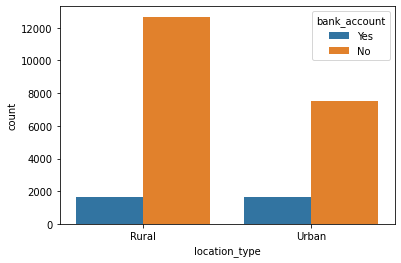

In [107]:
sns.countplot(data = df, x = "location_type", hue = "bank_account")

In [ ]:
# Looks like if you live in a Rural setting,
# you are less likely to own a bank account

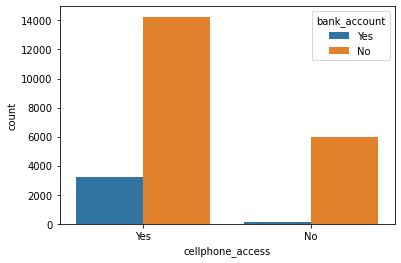

In [108]:
sns.countplot(data = df, x = "cellphone_access", hue = "bank_account")

In [ ]:
# If someone does not have a phone, they
# are very unlikely to have a bank account

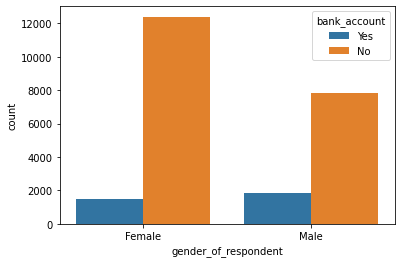

In [109]:
sns.countplot(data = df, x = "gender_of_respondent", hue = "bank_account")

In [ ]:
# It seems females were more likely to
# have a bank account

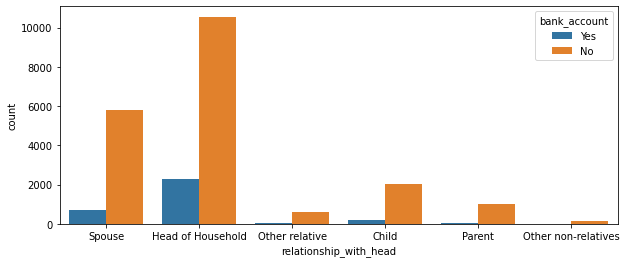

In [118]:
plt.figure(figsize= (10, 4))
sns.countplot(data = df, x = "relationship_with_head", hue = "bank_account")

In [ ]:
# It seems that if you were the head of a household you were
# most likely to have a bank account. Followed by if you were a spouse,
# then a parent, then a child.

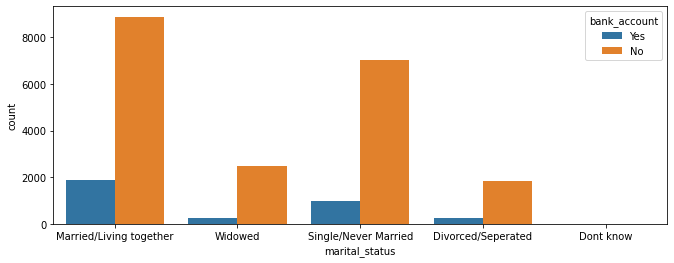

In [121]:
plt.figure(figsize= (11, 4))
sns.countplot(data = df, x = "marital_status", hue = "bank_account")

In [ ]:
# If you were married you were more likely to have a bank account
# Followed by if you were single. Then divorced / seperated.
# Then widowed

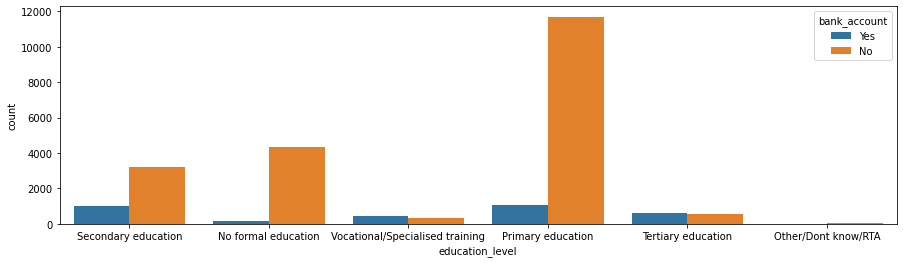

In [125]:
plt.figure(figsize= (15, 4))
sns.countplot(data = df, x = "education_level", hue = "bank_account")

In [ ]:
# If you have specialised training you were more likely to have a bank account.
# Followed by tertiary education. Then secondary education, then primary education. Then non formal education.

In [135]:
df["job_type"].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

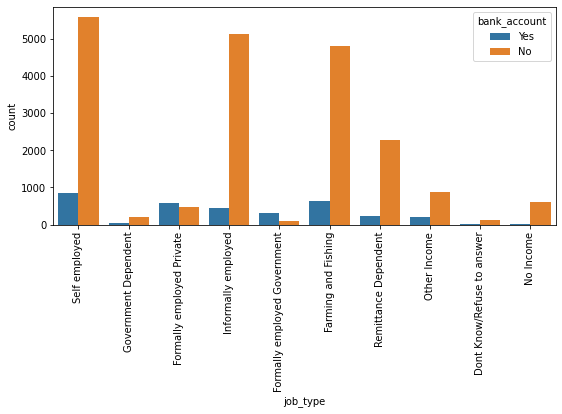

In [134]:
plt.figure(figsize= (9, 4))
plt.xticks(rotation=90)
sns.countplot(data = df, x = "job_type", hue = "bank_account")

In [ ]:
# It seems that Formally employed was the most likely to have a bank account. 
# Then Government dependent, Then other income and self-employed. 

Overall is seems there are many factors that can determine whether you have a bank account or not. But they are not very determinant. Meaning you have to use most of them together, to get a good accuracy.

## 6. Implementing the solution

#### X & Y

In [20]:
X = df.drop("bank_account", axis = 1)
y = df["bank_account"]

#### Train test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

#### Standardizing the data

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Modelling

In [24]:
MLP = MLPClassifier(hidden_layer_sizes = (9, 8, 6, 3), activation = "tanh", max_iter = 100000000, random_state = 42)
MLP.fit(X_train,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(9, 8, 6, 3),
              max_iter=100000000, random_state=42)

#### Evaluation

In [25]:
predictions = MLP.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))

[[3903   97]
 [ 513  192]]


In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      4000
           1       0.66      0.27      0.39       705

    accuracy                           0.87      4705
   macro avg       0.77      0.62      0.66      4705
weighted avg       0.85      0.87      0.85      4705



## Challenging the solution

The accuracy of the model can be improve by increasing the number of neurons.
However based on the data, we can tell the accuracy scores would not be too good for the financial inclusion section. This means that the nueral network is already performing well. That adding more neurons, may just create overfitting. Which may not give us a good model.

## Conclusion

In conclusion I believe that financial inclusion model for East africa. Was a very good predictor of whether a person would not have a bank account. Based on the demographics. However, it was not a good predictor of whether a person would actually have a bank account. So it cannot be used very reliably in determing whether a person has a bank account. Ways this can be improved is by limiting the data for the model, to one country at a time. To increase the accuracy. As there may be different ratios of demographics that lead to someone having a bank account in different countries. That would increase accuracy.

## Recommendation

I recommend that the Finscope group. Use intuition rather than variables to rpedict whether someone would have a bank account or not. As based on the visualizations. Most people had a bank account due to signs on economic development. However these were still not very good predictors, and mostly offered only 40% in terms of accuracy as a predictor. This is why they should use other ideas to determine whether someone is financially inclusive or not. As most believe it is due to economic development, and money in a community.

## 10. Follow up questions

### a). Did we have the right data?

Yes, I believe we had the right data. As we had many variables that we could use to help us predict whether someone would have a bank account or not.

### b). Do we need other data to answer our question?

I believe we have enough data. I just believe that the accuracy scores are low. That the company should use other means to determine whether a person would have a bank account or not. Mainly qualitative means, as this would provide a much higher accuracy.

### c). Did we have the right question?

Yes, we had the right question. As financial inclusion, is the most important question in terms of this data. This means we had the right question.